<a href="https://colab.research.google.com/github/sanjeesi/Notes-Notebooks/blob/master/Data%20Science%20IITM/MLT/Week%202/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective of this notebook is to:
- Demonstrate training data and model components of linear regression model.
- Demonstrate how simple it is to implement ML components and algorithms.

Let's first import the required libraries.

In [79]:
from IPython.display import display, Math, Latex
# imported for proper rendering of LaTeX in notebook

import numpy as np

# import for generating plots
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

1. Training data contains features and label that is real number.
2. Model or inference: $y = Xw$

# 1. Training Data

In [80]:
# Create a dataset of 100 examples with a single feature and a label.
# For this construction, we use the following three parameters:
w1=3
w0=4
n=100

X = 10*np.random.rand(n,)

# Obtain y = 4 + 3x + noise.    Noise is randomly sampled.
y = w0 + w1*X + np.random.randn(n,)

Let's examine the shapes of training data for sanity check.

In [81]:
print("Shape of the training data feature matrix: ", X.shape)
print("Shape of label vector: ", y.shape)

Shape of the training data feature matrix:  (100,)
Shape of label vector:  (100,)


Let's divide the data into training and test set. We will set aside 20% examples for testing.

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's do a quick sanity check to make sure the sizes of feature and labels sets are identical in both training and test sets.

In [83]:
print("Shape of training feature matrix: ", X_train.shape)
print("Shape of training label vector: ", y_train.shape)

print("Shpape of test feature matrix: ", X_test.shape)
print("Shape of test label vector: ", y_test.shape)

Shape of training feature matrix:  (80,)
Shape of training label vector:  (80,)
Shpape of test feature matrix:  (20,)
Shape of test label vector:  (20,)


Let's quickly check the first few examples and labels

In [84]:
X_train[:5]

array([5.27701973, 0.35608924, 1.85060333, 8.71293553, 0.70217469])

In [85]:
y_train[:5]

array([19.51579901,  4.33927356,  8.75276175, 30.65197436,  5.84976818])

Let's visualize the training set.

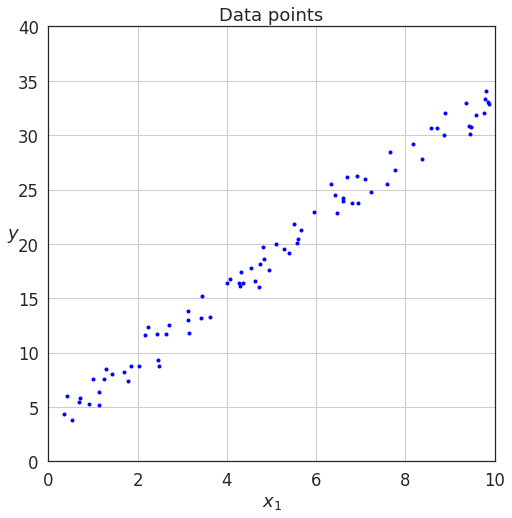

In [86]:
sns.set_style("white")
f = plt.figure(figsize=(8, 8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

plt.plot(X_train, y_train, "b.")
plt.title("Data points")
plt.grid(True)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 10, 0, 40])

plt.show()

We have a training set consisting a single feature so we will fit a simple linear regression model with one feature. It's form is: $y = w_0 + w_1x_1$.  

We also add a special dummy feature $x_0$ and set it to 1. We create a helper function for that.

In [87]:
def add_dummy_feature(x):
    ''' Adds a dummy feature to the dataset.
    
    Args:
        x: Training dataset
        
    Returns:
        Training dataset with an addition of dummy feature.
    '''
    return np.column_stack((np.ones(x.shape[0]), x))

Let's preprocess the training set to add the dummy feature

In [88]:
print("Before adding dummy feature:\n", X_train[:5])
print("\n")

X_train = add_dummy_feature(X_train)
print("After adding dummy feature:\n", X_train[:5])

Before adding dummy feature:
 [5.27701973 0.35608924 1.85060333 8.71293553 0.70217469]


After adding dummy feature:
 [[1.         5.27701973]
 [1.         0.35608924]
 [1.         1.85060333]
 [1.         8.71293553]
 [1.         0.70217469]]


# 2. Model
The general vectorized form is as follows:
$$
y_{n \times 1} = X_{n \times (m+1)}w_{(m+1) \times 1}
$$

In [89]:
def predict(X, w):
    '''Prediction of output label for a given input.
    
    Args:
        X: Feature matrix of shape (n, m+1).
        w: weight vector of shape (m+1, 1).
        
    Returns:
        y: Predicted label vector of shape (n,).
    '''
    # Check to make sure that feature matrix and weight vector have compatible shapes.
    assert X.shape[1] == w.shape[0], "X and w don't have compatible dimensions."
    return X @ w

Since we have not yet trained our model, let's use a random weight vector to get predictions from our model for the given dataset:

In [90]:
w=np.random.rand(X_train.shape[1],)
w

array([0.69806173, 0.01394705])

In [91]:
y_hat = predict(X_train, w)

Let's compare the prediction with the actual value:

In [92]:
y_hat[:5]

array([0.77166061, 0.70302813, 0.7238722 , 0.81958152, 0.707855  ])

In [93]:
y_train[:5]

array([19.51579901,  4.33927356,  8.75276175, 30.65197436,  5.84976818])

Since we used a random weight vector w, most of the predicted labels do not match the actual labels.

### Comparision of vectorized and non-vectorized version of model inference

In [94]:
def non_vectorized_predict(X, w):
    '''Prediction of output label for a given input.
    
    Args:
        X: Feature matrix of shape (n, m+1).
        w: weight vector of shape (m+1, 1).
        
    Returns:
        y: Predicted label vector of shape (n,).
    '''
    y = []
    for i in range(0, X.shape[0]):
        y_hat_i = 0
        for j in range(0, X.shape[1]):
            y_hat_i += X[i][j] * w[j]
        y.append(y_hat_i)
    return np.array(y)

> For fairly large number of training examples the time of execution for vectorized form as compared to non vectorized form is less.  
> And we can actually see this particular phenomenon across different components of the ML models. **The vectorized implementations are far superior in terms of performance than their non-vectorized counterparts.** 

# 3. Loss function implementation
Loss function: $$ J(w) = \frac{1}{2}(Xw - y)^T(Xw - y) $$

In [95]:
def loss(X, y, w):
    '''Calculates loss for a model based on known labels.
    Args:
        X: Feature matrix for given inputs.
        y: Output label vector as predicted by the given model.
        w: Weight vector
        
    Returns:
        Loss
    '''
    e = predict(X, w) - y
    return (1/2) * (np.transpose(e) @ e)

# 4. Optimization
The objective id to implement optimization component of linear regression model.  
It is implemented with one of the following two methods:
* **Normal Equation method**: Sets the partial derivatives of the loss function w.r.t. weight vector to 0 and solves the resulting equation to obtain the weight vector.
* **Gradient Descent method**: iteratively adjusts the weight vector based on the learning rate and the gradient of loss function at the current weight vector.

## Normal Equation
The weight vector is estimated by matrix multiplication of psuedo-inverse of feature matrix and the label vector.  
The vectorized implementation is fairly straight forward.
- We make use of `np.lialg.pinv` for calculating psuedoinverse of the feature matrix.

In [96]:
def normal_equation(X, y):
  '''Estimates parameters of the linear regression model with normal equation.

    Args:
      X: Feature matrix for given inputs.
      y: Actual label vector.

    Returns:
      Weight vector
  '''
  return np.linalg.pinv(X) @ y


## Gradient Descent (GD)
GD is implemented as follows:
- Randomly initialize **w** to **0**.
- Iterate until convergence:
  - Calculate partial derivative of loss w.r.t. weight vector.
  - Calculate new values *simultaneously*.

We use number of epochs as a convergence criteria in this implementation.  

### Partial derivative of loss function
Let's first implement a function to calculate partial derivative of loss function, which is obtained with following equation:
$$
\frac{\delta}{\delta w}J(w) = X^T(Xw-y)
$$
The multiplication of transpose of feature matrix with the difference of predicted and actual label vectors.

In [97]:
def calculate_gradient(X, y, w):
  '''Calculate gradients of loss function w.r.t. weight vector on training set.
    
    Arguments:
      X: feature matrix for training data
      y: Label vector for training data
      w: Weight vector

    Returns:
      A vector of gradients.
  '''
  return np.transpose(X) @ (predict(X, w) - y)

### Weight updates
Next let's implement the weight update part:
- We obtain the new weight vector from the old one by subtracting gradient weighted by the learning rate.

In [98]:
def update_weights(w, grad, lr):
  '''Updates the weights based on the gradient of loss function.

    Weight updates are carried out with the following formula:
      w_new := w_old - lr*grad

    Args:
      w: weight vector
      grad: gradient of loss w.r.t. w
      lr: learning rate

    Returns:
      Updated weight vector
  '''
  return (w - lr*grad)


With these building blocks in place, let's implement gradient descent procedure:

In [104]:
def gradient_descent(X:np.ndarray, y:np.ndarray, lr:float, num_epochs:int):
  '''Estimates parameters of linear regression model through gradient descent.

    Arguments:
      X: Feature matrix for training data.
      y: Label vector for training data.
      lr: learning rate
      num_epochs: Number of training steps

    Returns:
      Weight vector: Final weight vector
      Error vector across different iterations
      Weight vectors across different iterations
  '''
  w_all = []    # all parameters across iterations.
  err_all = []    # all errors across iterations.

  # Parameter vector initialized to [0, 0]
  w = np.zeros(X.shape[1])

  # Gradient descent loop
  for i in np.arange(0, num_epochs):
    w_all.append(w)

    # Calculate error due to current weight vector: Note that here we use
    # loss function to calculate the loss.
    err_all.append(loss(X, y, w))

    # Gradient calculation
    djdW = calculate_gradient(X, y, w)

    # Print stats every 100 iterations
    if i%100 == 0:
      print('Iteration #: %d, loss: %4.2f'%(i, err_all[-1]))

    # Weight vector update.
    w = update_weights(w, djdW, lr)

  return w, err_all, w_all

Since we store weights in each iteration, we can use them to plot intermediate models in order to understand the trajectory taken by GD.  
In the following code, 
- `err_all` contains loss values across all iterations and
- `w_all` contains weight vectors across all iterations.

In [107]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr=0.00001, num_epochs=1000)

Iteration #: 0, loss: 17362.95
Iteration #: 100, loss: 196.71
Iteration #: 200, loss: 128.54
Iteration #: 300, loss: 125.24
Iteration #: 400, loss: 122.31
Iteration #: 500, loss: 119.48
Iteration #: 600, loss: 116.77
Iteration #: 700, loss: 114.15
Iteration #: 800, loss: 111.64
Iteration #: 900, loss: 109.22


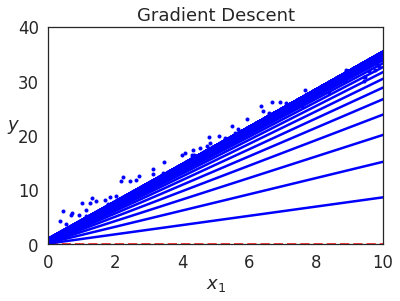

In [108]:
# @title [Plot model trajectory]
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1 to each instance
X_new = np.array([[0], [10]])
X_new_b = np.c_[np.ones((2,1)), X_new]  # add x0 = 1 to each instance

for j in range(0, len(w_all)):
  if j%10 != 0: continue
  y_hat = predict(X_new_b, w_all[j])
  style = "b-" if j>0 else "r--"
  plt.plot(X_new_b[:,1], y_hat, style)

plt.plot(X_train[:, 1], y_train, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title('Gradient Descent', fontsize=18)
plt.axis([0, 10, 0, 40])
plt.show()

Let's plot the learning curves.

In [109]:
def plot_learning_curves(err_all):
  plt.plot(err_all)
  plt.xlabel('iteration #')
  plt.ylabel('Loss: $J(\mathbf{w})$')

Iteration #: 0, loss: 17362.95
Iteration #: 100, loss: 106.87
Iteration #: 200, loss: 87.90
Iteration #: 300, loss: 74.99
Iteration #: 400, loss: 66.20
Iteration #: 500, loss: 60.23
Iteration #: 600, loss: 56.16
Iteration #: 700, loss: 53.39
Iteration #: 800, loss: 51.51
Iteration #: 900, loss: 50.23
Iteration #: 1000, loss: 49.35
Iteration #: 1100, loss: 48.76
Iteration #: 1200, loss: 48.36
Iteration #: 1300, loss: 48.08
Iteration #: 1400, loss: 47.89
Iteration #: 1500, loss: 47.77
Iteration #: 1600, loss: 47.68
Iteration #: 1700, loss: 47.62
Iteration #: 1800, loss: 47.58
Iteration #: 1900, loss: 47.55


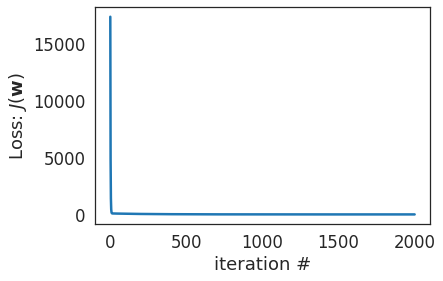

In [121]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr=0.0001, num_epochs=2000)
plot_learning_curves(err_all)

### Learning rate and convergence
Let's vary the learning rate and observe change in the convergence characteristics of GD.  
We will use:
- $\alpha = \{1e-6, 1e-4, 1e-1\}$ to run GD for 2000 epochs each.
- Compare the convergence characteristics.

Iteration #: 0, loss: 17362.95
Iteration #: 100, loss: 10067.66
Iteration #: 200, loss: 5861.29
Iteration #: 300, loss: 3435.88
Iteration #: 400, loss: 2037.32
Iteration #: 500, loss: 1230.82
Iteration #: 600, loss: 765.68
Iteration #: 700, loss: 497.35
Iteration #: 800, loss: 342.51
Iteration #: 900, loss: 253.09
Iteration #: 1000, loss: 201.40
Iteration #: 1100, loss: 171.46
Iteration #: 1200, loss: 154.07
Iteration #: 1300, loss: 143.90
Iteration #: 1400, loss: 137.91
Iteration #: 1500, loss: 134.31
Iteration #: 1600, loss: 132.11
Iteration #: 1700, loss: 130.71
Iteration #: 1800, loss: 129.77
Iteration #: 1900, loss: 129.09


Text(0.5, 1.0, 'lr=1e-6')

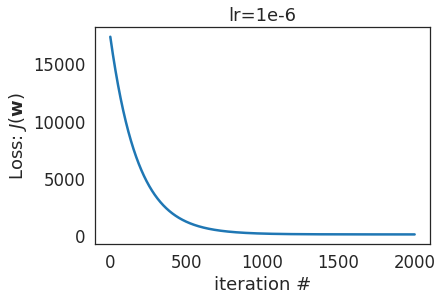

In [123]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr=1e-6, num_epochs=2000)
plot_learning_curves(err_all)
plt.title('lr=1e-6')

Iteration #: 0, loss: 17362.95
Iteration #: 100, loss: 106.87
Iteration #: 200, loss: 87.90
Iteration #: 300, loss: 74.99
Iteration #: 400, loss: 66.20
Iteration #: 500, loss: 60.23
Iteration #: 600, loss: 56.16
Iteration #: 700, loss: 53.39
Iteration #: 800, loss: 51.51
Iteration #: 900, loss: 50.23
Iteration #: 1000, loss: 49.35
Iteration #: 1100, loss: 48.76
Iteration #: 1200, loss: 48.36
Iteration #: 1300, loss: 48.08
Iteration #: 1400, loss: 47.89
Iteration #: 1500, loss: 47.77
Iteration #: 1600, loss: 47.68
Iteration #: 1700, loss: 47.62
Iteration #: 1800, loss: 47.58
Iteration #: 1900, loss: 47.55


Text(0.5, 1.0, 'lr=1e-4')

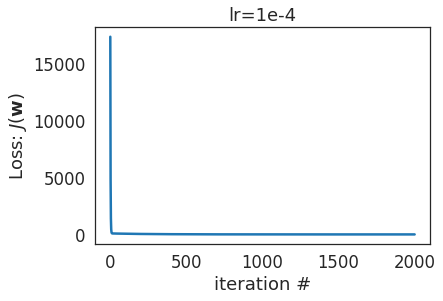

In [124]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr=1e-4, num_epochs=2000)
plot_learning_curves(err_all)
plt.title('lr=1e-4')

Iteration #: 0, loss: 17362.95
Iteration #: 100, loss:  inf
Iteration #: 200, loss:  nan
Iteration #: 300, loss:  nan
Iteration #: 400, loss:  nan
Iteration #: 500, loss:  nan
Iteration #: 600, loss:  nan
Iteration #: 700, loss:  nan
Iteration #: 800, loss:  nan
Iteration #: 900, loss:  nan
Iteration #: 1000, loss:  nan
Iteration #: 1100, loss:  nan
Iteration #: 1200, loss:  nan
Iteration #: 1300, loss:  nan
Iteration #: 1400, loss:  nan
Iteration #: 1500, loss:  nan
Iteration #: 1600, loss:  nan
Iteration #: 1700, loss:  nan
Iteration #: 1800, loss:  nan
Iteration #: 1900, loss:  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in matmul
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'lr=1e-1')

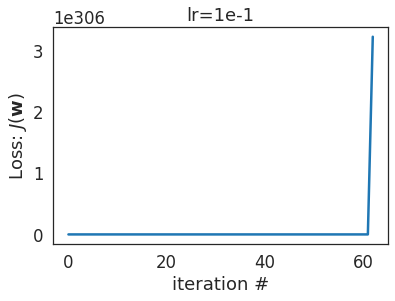

In [125]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr=1e-1, num_epochs=2000)
plot_learning_curves(err_all)
plt.title('lr=1e-1')

## Optimization - Variations of GD (minibatch and stochastic)
The objective is to implemant minibatch and stochastic gradient descent.

1. Generate data
2. Train-Test split
3. Add dummy feature

### Mini-batch gradient descent (MBGD)
The key idea is to perform weight updates by computing gradient on batches of small number of examples.

In [127]:
t0, t1 = 200, 100000
def learning_schedule(t):
  return t0 / (t + t1)

# Learning schedule gradually decreases the learning rate.
# We initially start with larger learning rate and the learning_schedule will
# gradually decrease it as we make iterations through these procedures.

In [128]:
def mini_batch_gd(X:np.ndarray, y:np.ndarray, num_iters:int, minibatch_size:int):
  w_all = []
  err_all = []

  # Parameter vector initialized to [0, 0]
  w = np.zeros((X.shape[-1]))
  t = 0

  for epoch in range(num_iters):
    shuffled_indices = np.random.permutation(X.shape[0])
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, X.shape[0], minibatch_size):
      t += 1
      xi = X_shuffled[i:i+minibatch_size]
      yi = y_shuffled[i:i+minibatch_size]
      err_all.append(loss(xi, yi, w))

      gradients = 2/minibatch_size * calculate_gradient(xi, yi, w)
      lr = learning_schedule(t)

      w = update_weights(w, gradients, lr)
      w_all.append(w)
  return w, err_all, w_all

Let's look at the learning curves for mini-batch GD:

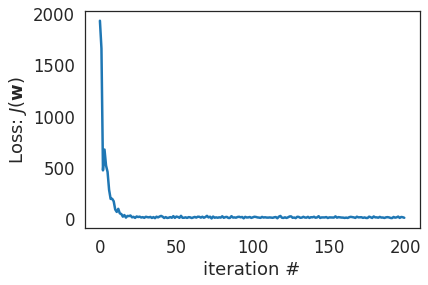

In [129]:
w, err_all, w_all = mini_batch_gd(X_train, y_train, 20, 8)
plot_learning_curves(err_all)

### Stochastic gradient descent (SGD)
The key idea here is to perform weight updates by computing gradient on one example at a time.  
It is infact MBGD with number of example per batch = 1.

In [130]:
def sgd(X:np.ndarray, y:np.ndarray, num_epochs:int):
  w_all = []
  err_all = []

  w = np.zeros((X.shape[1]))
  for epoch in range(num_epochs):
    for i in range(X.shape[0]):
      random_index = np.random.randint(X.shape[0])
      xi = X[random_index: random_index+1]
      yi = y[random_index: random_index+1]
      err_all.append(loss(xi, yi, w))

      gradients = 2* calculate_gradient(xi, yi, w)
      lr = learning_schedule(epoch * X.shape[0] + i)

      w = update_weights(w, gradients, lr)
      w_all.append(w)
  return w, err_all, w_all

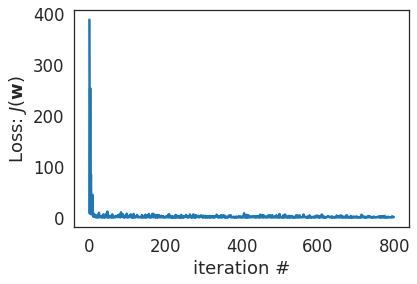

In [131]:
w, err_all, w_all = sgd(X_train, y_train, 10)
plot_learning_curves(err_all)